In [1]:
#Partial Diff Eq Project
%pylab inline
from scipy.optimize import fsolve
from matplotlib import animation
from IPython.display import HTML

def implot(xx,yy,zz):
    """takes three matrices, xx and yy as from meshgrid(x,y), zz = f(xx,yy).
    produces an image plot of f(x,y)"""
    im = imshow(zz,extent=(xx.min(),xx.max(),yy.min(),yy.max()),
                origin='lower',aspect='auto')
    colorbar()
    return im

Populating the interactive namespace from numpy and matplotlib


# Modeling a Gas Centrifuge

#### How does the maximum pressure in the system depend on the angular velocity of the gas?

![alt text](gas.jpg)

From the image of the centrifuge above and knowing the basics of how they work, we can see that there will be a vertical acceleration due to gravity but also a horizontal centrifugal acceleration due to the rotation.

This means that our PDE is going to be,

$$\vec{\nabla} P(r,z) = -\rho(r,z) g \hat{z} + \rho(r,z) r\omega^2 \hat{r}$$

I will spare the details, but if you go through and solve this equation analytically using PDE techniques, namely assuming the behavior, P(r,z) = R(r)Z(z) and subsituting $\rho(r,z) = ap$, where $a$ is a proportionality constant steaming from the ideal gas law, we get the solution,

$$ P(r,z) = P_{0} e^{\frac{ar^2\omega^2}{2} - agz}$$


For fsolve, we need a matrix representation of this state for a return value, and it needs to be equal to zero. Because there are two equations here, we need both the left and right side to go to zero,

$$(\partial_r P(r,z) - \rho(r,z) r \omega^2) + (\partial_z P(r,z) + \rho(r,z) g) = 0$$

With both of those equations, we can compare the analytical and the numerical solutions with varying angular velocities to see how accurate and sensible the results are. 

In [37]:
def f(s, r, nr,dr,nz,dz,w,a,g):
    p = s.reshape((nr,nz)) #Resize the original state
    rho = a*p #Calculate the density
    pa = np.zeros((nr + 2,nz + 2)) #Create larger matrix for boundry conditions
    
    pa[1:-1,1:-1] = p #Copy original into the central region of the new matrix
    pa[:,0] = pa[:,1] #Setting the r = 0 boundry condition
    pa[:,-1] = pa[:,-2] #Setting the r = last element boundry condition
    pa[0,:] = pa[1,:]*(1 + g*a*dz) #Setting the z = 0 boundry condition
    pa[-1,:] = pa[-2,:] #Setting the z = last element boundry condition
    
    pa[0,1] = 1 #An injection of gas into the system (At the bottom center of the tank)
    
    dpdr = (pa[1:-1,1:-1] - pa[1:-1,:-2])/dr #Backwards difference for the pressure wrt radius
    dpdz = (pa[1:-1,1:-1] - pa[:-2,1:-1])/dz #Backwards difference for the pressure wrt height
    fsolveEQN = (dpdr - rho*r*w**2) + (dpdz + rho*g) 
    
    return fsolveEQN.reshape(nr*nz) #return a slice notation representation of the equation

1.6314936751726747

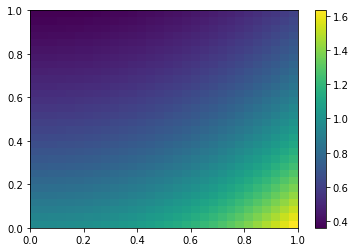

In [41]:
nr,nz = 30,30
#Setting up a 1 meter by 1 meter centrifuge..
r = linspace(0,1,nr) 
dr = r[1] - r[0]
z = linspace(0,1,nz)
dz = z[1] - z[0]
rr,zz = meshgrid(r,z) #Creating a matrix version
p0 = zeros((nr,nz)) #Initial pressure is zero...
ts = linspace(0,2,100)
a = 1; g = 1; #The math is easier if these are 1, plus in the above equation, the
                #w^2 should have a much higher dependence anyways
#Setting the initial angular velocity and solving
w = 1
ans = fsolve(f, p0.reshape(-1),(r,nr,dr,nz,dz,w,a,g))
implot(rr,zz,ans.reshape(nr,nz))
ans.reshape(nr,nz)[0,-1] #Bottom corner, or where the highest pressure is

8.493030955330044

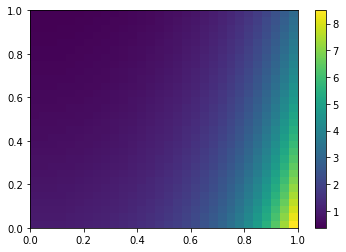

In [42]:
w = 2
ans = fsolve(f, p0.reshape(-1),(r,nr,dr,nz,dz,w,a,g))
implot(rr,zz,ans.reshape(nr,nz))
ans.reshape(nr,nz)[0,-1]

35029.08556861025

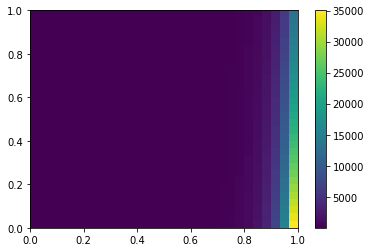

In [44]:
w = 4
ans = fsolve(f, p0.reshape(-1),(r,nr,dr,nz,dz,w,a,g))
implot(rr,zz,ans.reshape(nr,nz))
ans.reshape(nr,nz)[0,-1]